<a href="https://colab.research.google.com/github/Mayada98/GoogleColabProjects/blob/main/TensorflowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import adam_v2
from keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

#### Here is how to install libraries and packages in colab notebook

In [8]:
!pip install pydot

Generating our oun data using numpy to train out neural network.


---


Background story:


In [2]:
train_samples = []
train_labels = []
for i in range(50): #50 iterations since we are generatin 2 random values - random_younger and random_older, which will end up with a total of 100
  # the ~5% of young  individuals who did experience side effects
  random_younger = np.random.randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # the ~5% of old  individuals who did not experience side effects
  random_older = np.random.randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000): #1000 iterations since we are generatin 2 random values - random_younger and random_older, which will end up with a total of 2000
  # the ~95% of young  individuals who did not experience side effects
  random_younger = np.random.randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # the ~95% of young  individuals who did experience side effects
  random_older = np.random.randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [3]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples) # we do this to get rid of any imposed order from the data generation process 

In [4]:
# We do this step to normalize/standardize our data so the training of our neural network becomes more efficient
scaler = MinMaxScaler(feature_range= (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # rescaling data from scale 13 to 100 down to 0 to 1. We also convert the array into 2D array.

In [41]:
from keras.engine import input_layer
model = Sequential([Dense(units = 16, input_shape = (1,), activation = 'relu'), 
                    Dense(units = 32, activation = 'relu'), 
                    Dense(units = 2, activation = 'softmax')]) # 2 units corresponding to the class 1 and 0 - probability of experiencing side effects
                    #Dense is the densely (fully) connected  layer

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                32        
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer = adam_v2.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)

Epoch 1/30
210/210 - 1s - loss: 0.6761 - accuracy: 0.5519 - 676ms/epoch - 3ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6366 - accuracy: 0.6510 - 302ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.5928 - accuracy: 0.7567 - 291ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.5541 - accuracy: 0.7919 - 308ms/epoch - 1ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5147 - accuracy: 0.8224 - 302ms/epoch - 1ms/step
Epoch 6/30
210/210 - 0s - loss: 0.4768 - accuracy: 0.8576 - 291ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4411 - accuracy: 0.8767 - 289ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4093 - accuracy: 0.8876 - 297ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.3815 - accuracy: 0.9010 - 294ms/epoch - 1ms/step
Epoch 10/30
210/210 - 0s - loss: 0.3579 - accuracy: 0.9152 - 310ms/epoch - 1ms/step
Epoch 11/30
210/210 - 0s - loss: 0.3384 - accuracy: 0.9157 - 296ms/epoch - 1ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3221 - accuracy: 0.9229 - 293ms/epoch - 1ms/step
E

In [22]:
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(18,input_dim=1,kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer= adam_v2.Adam(learning_rate = 0.0001), metrics = ['accuracy'])    
  return model

In [23]:
model = baseline_model()

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 18)                36        
                                                                 
 dense_15 (Dense)            (None, 32)                608       
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size = 10, epochs = 30, shuffle = True, verbose =2)

Epoch 1/30
210/210 - 1s - loss: 0.2510 - accuracy: 0.5376 - 955ms/epoch - 5ms/step
Epoch 2/30
210/210 - 0s - loss: 0.2470 - accuracy: 0.6767 - 291ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.2428 - accuracy: 0.7019 - 314ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.2365 - accuracy: 0.7138 - 286ms/epoch - 1ms/step
Epoch 5/30
210/210 - 0s - loss: 0.2280 - accuracy: 0.7590 - 290ms/epoch - 1ms/step
Epoch 6/30
210/210 - 0s - loss: 0.2179 - accuracy: 0.7848 - 288ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.2065 - accuracy: 0.8081 - 286ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.1942 - accuracy: 0.8310 - 287ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.1817 - accuracy: 0.8548 - 284ms/epoch - 1ms/step
Epoch 10/30
210/210 - 0s - loss: 0.1694 - accuracy: 0.8643 - 294ms/epoch - 1ms/step
Epoch 11/30
210/210 - 0s - loss: 0.1576 - accuracy: 0.8800 - 281ms/epoch - 1ms/step
Epoch 12/30
210/210 - 0s - loss: 0.1467 - accuracy: 0.8876 - 281ms/epoch - 1ms/step
E

Adding validation sets to our model


---


There are 2 ways to do this. Firs one would be to pass a validation set in the form of a tuple of arrays x and y like so: validation_set = (x_val, y_val). The second way is to specify a split threshold like in the scikit learn train_test_split function where we specify test_size to be a percent of the data.

In [45]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2533 - accuracy: 0.9397 - val_loss: 0.2001 - val_accuracy: 0.9571 - 472ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2525 - accuracy: 0.9418 - val_loss: 0.1988 - val_accuracy: 0.9571 - 299ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2516 - accuracy: 0.9423 - val_loss: 0.1973 - val_accuracy: 0.9571 - 342ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2508 - accuracy: 0.9392 - val_loss: 0.1966 - val_accuracy: 0.9571 - 338ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2502 - accuracy: 0.9423 - val_loss: 0.1951 - val_accuracy: 0.9571 - 341ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2494 - accuracy: 0.9392 - val_loss: 0.1944 - val_accuracy: 0.9571 - 334ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2487 - accuracy: 0.9439 - val_loss: 0.1937 - val_accuracy: 0.9571 - 346ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2481 - accuracy: 0.9397 - val_loss: 0.1929 - val_accuracy: 0.9571 - 306ms/epoch - 2ms/step


Creating a test set to check wheher the model can generalize well with unseen data

In [58]:
test_samples = []
test_labels = []

In [59]:
for i in range(50): #50 iterations since we are generatin 2 random values - random_younger and random_older, which will end up with a total of 100
  # the ~5% of young  individuals who did experience side effects
  random_younger = np.random.randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # the ~5% of old  individuals who did not experience side effects
  random_older = np.random.randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000): #1000 iterations since we are generatin 2 random values - random_younger and random_older, which will end up with a total of 2000
  # the ~95% of young  individuals who did not experience side effects
  random_younger = np.random.randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # the ~95% of young  individuals who did experience side effects
  random_older = np.random.randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [60]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples) # we do this to get rid of any imposed order from the data generation process 

In [61]:
# We do this step to normalize/standardize our data so the training of our neural network becomes more efficient
scaler = MinMaxScaler(feature_range= (0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1)) # rescaling data from scale 13 to 100 down to 0 to 1. We also convert the array into 2D array.

In [62]:
predictions = model.predict(x = scaled_train_samples, batch_size=10, verbose = 0)

In [63]:
predictions

array([[0.02988226, 0.97011775],
       [0.9691892 , 0.03081078],
       [0.46802506, 0.531975  ],
       ...,
       [0.05080276, 0.9491972 ],
       [0.8604387 , 0.13956133],
       [0.03267036, 0.9673296 ]], dtype=float32)

In [64]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [65]:
rounded_predictions

array([1, 0, 1, ..., 1, 0, 1])

Confusion Matrix

In [66]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [67]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [78]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Cofusion_matrix', cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation= 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks =  np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j], horizontalalignment = 'center', color = 'black' if cm[i,j] > thresh else 'white')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization


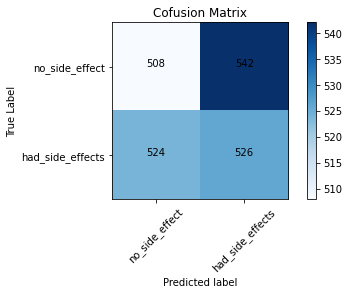

In [79]:
cm_plot_labels = ['no_side_effect', 'had_side_effects']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Cofusion Matrix')

In [80]:
!pip install pyyaml h5py  # Required to save models in HDF5 format